# AR(1)モデルのシミュレーション

In [1]:
using JupyterFormatter
enable_autoformat()

using Random, Plots

In [16]:
function ar1_model(
    μ::Float64,   # 平均値
    β::Float64,   # 自己回帰の係数。-1 < β < 1 の場合に平均回帰性を持つ。μ = α / (1 - β)
    σ::Float64,   # ホワイトノイズの分散
    T::Int = 100, # タイムステップ
)::Vector{Float16}
    α = μ * (1 - β)  # 定数項。μから逆算する。
    x = Vector{Float16}(undef, T + 1)
    x[1] = μ

    for t = 1:T
        ϵ = σ * randn()  # white noise
        x[t+1] = α + β * x[t] + ϵ
    end

    return x
end

function plot_process(params::Vector, μ::Float64 = 1.0)::Nothing
    p = plot(
        xlabel = "K Year",
        ylabel = "xₜ",
        title = "Death rate simulated by AR(1) process",
    )

    for (β, σ, lc) in params
        data = ar1_model(μ, β, σ)
        plot!(data, lc = lc, label = "β = $(β), σ = $(σ)")
    end

    display(p)

    return
end;

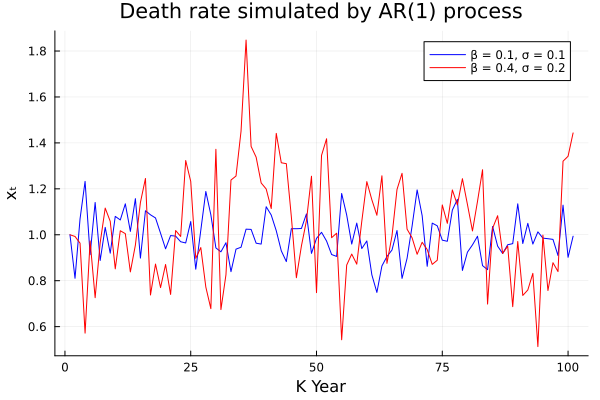

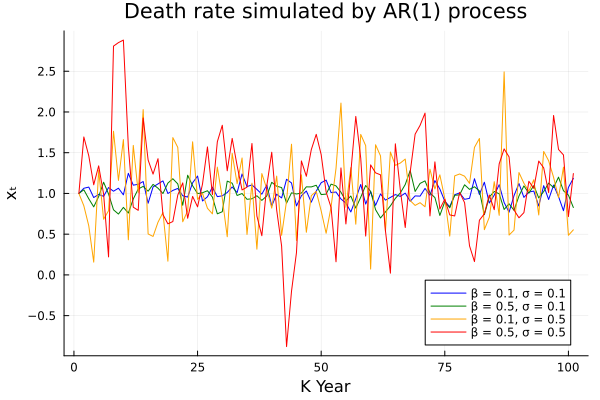

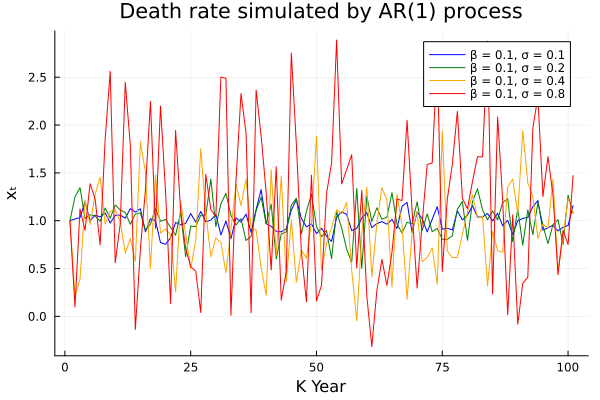

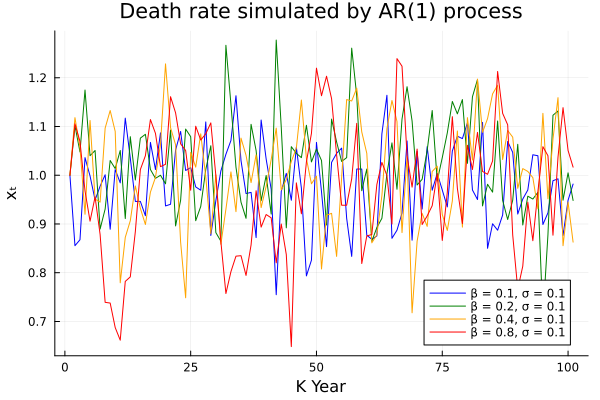

In [17]:
# β, σ, lc
plot_process([(0.1, 0.1, :blue), (0.4, 0.2, :red)])
plot_process([(0.1, 0.1, :blue), (0.5, 0.1, :green), (0.1, 0.5, :orange), (0.5, 0.5, :red)])
plot_process([(0.1, 0.1, :blue), (0.1, 0.2, :green), (0.1, 0.4, :orange), (0.1, 0.8, :red)])
plot_process([(0.1, 0.1, :blue), (0.2, 0.1, :green), (0.4, 0.1, :orange), (0.8, 0.1, :red)])